In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install plotly.express 
!pip install scikit-learn
!pip install wordcloud 
!pip install requests
!pip install bs4
!pip install lxml
!pip install torch
!pip install transformers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv("C:/Users/Nick/Desktop/Amazon_prediction/data/final_book_dataset_kaggle2.csv")
df.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

In [5]:
# Print unique values in the 'n_reviews' column
print(df['n_reviews'].unique())


['23' '124' '10' '1,686' '12' '31' '72' '205' '5' '14' '46' '201' '292'
 '20' '4' '1,358' nan '386' '56' '1,330' '55' '10,103' '69' '172' '264'
 '274' '2,568' '509' '126' '102' '13' '38' '26' '57' '6' '171' '76' '16'
 '84' '24' '100' '32' '63' '2,362' '290' '232' '1' '281' '58' '2' '297'
 '60' '229' '42' '2,672' '101' '527' '21' '44' '493' '142' '28' '187' '3'
 '463' '54' '19' '137' '108' '442' '11' '279' '7' '110' '48' '254' '51'
 '9' '93' '119' '234' '39' '429' '735' '318' '175' '15' '25' '347' '174'
 '17' '26,560' '293' '29' '33' '53' '260' '40' '45' '78' '73' '81' '82'
 '410' '27' '8' '1,155' '3,443' '1,527' '196' '105' '61' '62' '50' '136'
 '22' '2,240' '1,984' '206' '183' '423' '116' '107' '268' '418' '273'
 '570' '235' '169' '91' '335' '36' '18' '298' '248' '165' '2,451' '180'
 '104' '151' '80' '194' '96' '127' '161' '334' '162' '138' '140' '95' '87'
 '486' '242' '70' '736' '30' '37' '112' '1,426' '125' '695' '580' '658'
 '3,493' '217' '483' '157' '89' '41' '92' '34' '49' '115' 

In [6]:
# Remove common non-numeric characters and convert to numeric
df['n_reviews'] = pd.to_numeric(df['n_reviews'].astype(str).str.replace(',', '').str.replace('other_non_numeric_chars', ''), errors='coerce')
df


,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23.0,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124.0,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10.0,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,1686.0,75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12.0,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,Deep Learning: Engage the World Change the World,"[ Michael Fullan, Joanne Quinn, et al.]",5.33,8.55 - 35.33,208,4.5,74.0,72%,14%,7%,2%,4%,7 x 0.47 x 10 inches,15.5 ounces,English,"Corwin; First edition (December 15, 2017)",59,/Deep-Learning-Engage-World-Change/dp/15063685...,https://www.amazon.com/Deep-Learning-Engage-Wo...
826,Machine Learning in Finance: From Theory to Pr...,"[ Matthew F. Dixon, Igor Halperin, et al.]",55.18,52.41 - 55.18,573,4.5,93.0,78%,7%,7%,4%,4%,6.14 x 1.25 x 9.21 inches,2.25 pounds,English,"Springer; 1st ed. 2020 edition (July 2, 2020)",,/Machine-Learning-Finance-Theory-Practice/dp/3...,https://www.amazon.com/Machine-Learning-Financ...
827,Practical Deep Learning at Scale with MLflow: ...,"[ Yong Liu, and , Dr. Matei Zaharia]",44.99,44.99,288,4.8,8.0,83%,17%,NaN,NaN,NaN,7.5 x 0.65 x 9.25 inches,1.1 pounds,English,"Packt Publishing (July 8, 2022)",978-1803241333,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
828,Clinical Biostatistics and Epidemiology Made R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/Clinical-Biostatistics-Epidemiology-Ridiculou...,https://www.amazon.com/Clinical-Biostatistics-...


In [7]:
# Ensure 'n_reviews' is numeric and handle NaN values
# Ensure 'n_reviews' is numeric and handle NaN values
df['pages'] = pd.to_numeric(df['pages'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         736 non-null    float64
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    float64
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

In [8]:
columns = ['star1', 'star2', 'star3', 'star4', 'star5'] 

for col in columns:
    df[col] = df[col].str.rstrip('%').astype('float') / 100.0



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         736 non-null    float64
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    float64
 7   star5                         702 non-null    float64
 8   star4                         635 non-null    float64
 9   star3                         554 non-null    float64
 10  star2                         451 non-null    float64
 11  star1                         328 non-null    float64
 12  dimensions                    644 non-null    object 
 13  weigh

In [10]:
df[columns] = df[columns].fillna(0)

In [11]:
df.fillna({'n_reviews': 0, 'avg_reviews': 0, 'pages': 0, 'price': 0}, inplace=True)
#df[columns] = df[columns].fillna(0, inplace=True)
df.isna().sum()

title                             0
author                          173
price                             0
price (including used books)    108
pages                             0
avg_reviews                       0
n_reviews                         0
star5                             0
star4                             0
star3                             0
star2                             0
star1                             0
dimensions                      186
weight                          179
language                         71
publisher                       116
ISBN_13                         165
link                              0
complete_link                     0
dtype: int64

In [12]:
df

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500.0,4.4,23.0,0.55,0.39,0.06,0.00,0.00,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484.0,4.3,124.0,0.61,0.20,0.09,0.04,0.06,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274.0,4.7,10.0,0.87,0.13,0.00,0.00,0.00,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547.0,4.6,1686.0,0.75,0.16,0.05,0.02,0.02,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368.0,3.9,12.0,0.52,0.17,0.10,0.10,0.10,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,Deep Learning: Engage the World Change the World,"[ Michael Fullan, Joanne Quinn, et al.]",5.33,8.55 - 35.33,208.0,4.5,74.0,0.72,0.14,0.07,0.02,0.04,7 x 0.47 x 10 inches,15.5 ounces,English,"Corwin; First edition (December 15, 2017)",59,/Deep-Learning-Engage-World-Change/dp/15063685...,https://www.amazon.com/Deep-Learning-Engage-Wo...
826,Machine Learning in Finance: From Theory to Pr...,"[ Matthew F. Dixon, Igor Halperin, et al.]",55.18,52.41 - 55.18,573.0,4.5,93.0,0.78,0.07,0.07,0.04,0.04,6.14 x 1.25 x 9.21 inches,2.25 pounds,English,"Springer; 1st ed. 2020 edition (July 2, 2020)",,/Machine-Learning-Finance-Theory-Practice/dp/3...,https://www.amazon.com/Machine-Learning-Financ...
827,Practical Deep Learning at Scale with MLflow: ...,"[ Yong Liu, and , Dr. Matei Zaharia]",44.99,44.99,288.0,4.8,8.0,0.83,0.17,0.00,0.00,0.00,7.5 x 0.65 x 9.25 inches,1.1 pounds,English,"Packt Publishing (July 8, 2022)",978-1803241333,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
828,Clinical Biostatistics and Epidemiology Made R...,NaN,0.00,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,/Clinical-Biostatistics-Epidemiology-Ridiculou...,https://www.amazon.com/Clinical-Biostatistics-...


In [13]:
df.describe()

,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,40.442036,346.787952,3.782410,275.549398,0.617024,0.130964,0.057783,0.023313,0.016687
std,61.065493,256.017864,1.659408,1231.225332,0.296359,0.105583,0.061847,0.032662,0.029853
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.955000,174.250000,4.100000,5.000000,0.552500,0.042500,0.000000,0.000000,0.000000
50%,34.950000,333.000000,4.500000,31.000000,0.700000,0.130000,0.050000,0.010000,0.000000
75%,49.990000,468.000000,4.600000,134.250000,0.790000,0.190000,0.090000,0.030000,0.030000
max,1318.740000,2962.000000,5.000000,26560.000000,1.000000,0.640000,0.490000,0.220000,0.290000


In [14]:
df_sorted = df.sort_values(by='avg_reviews', ascending=False) #pages #n_reviews #avg_reviews #price
df_sorted.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
233,The Data Revolution: A Critical Analysis of Bi...,[ Rob Kitchin],42.00,42,376.0,5.0,3.0,1.00,0.00,0.0,0.0,0.0,6.69 x 0.85 x 9.53 inches,1.46 pounds,English,"SAGE Publications Ltd; Second edition (May 31,...",The Data Revolution,/Data-Revolution-Critical-Analysis-Infrastruct...,https://www.amazon.com/Data-Revolution-Critica...
797,Game Data Science,"[ Magy Seif El-Nasr, Truong-Huy D. Nguyen, et ...",52.79,47.30 - 52.79,416.0,5.0,6.0,1.00,0.00,0.0,0.0,0.0,6.3 x 0.8 x 9.3 inches,1.5 pounds,English,"Oxford University Press (December 14, 2021)",,/Game-Data-Science-Magy-El-Nasr/dp/0192897888/...,https://www.amazon.com/Game-Data-Science-Magy-...
252,Excel 2023: The Easiest Way to Master Microsof...,[ Leonard Webb],14.99,14.99,159.0,5.0,335.0,0.99,0.01,0.0,0.0,0.0,8 x 0.36 x 10 inches,14.9 ounces,English,"Independently published (October 28, 2022)",979-8360854005,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
251,Humanities Data Analysis: Case Studies with Py...,"[ Folgert Karsdorp, Mike Kestemont, et al.]",19.31,19.31,360.0,5.0,5.0,1.00,0.00,0.0,0.0,0.0,7.3 x 1 x 10.1 inches,2.6 pounds,English,"Princeton University Press (January 12, 2021)",978-0691172361,/Humanities-Data-Analysis-Studies-Python/dp/06...,https://www.amazon.com/Humanities-Data-Analysi...
650,Data Structures the Fun Way: An Amusing Advent...,[ Jeremy Kubica],39.99,39.99,304.0,5.0,1.0,1.00,0.00,0.0,0.0,0.0,7 x 0.7 x 9.2 inches,13 ounces,English,"No Starch Press (November 8, 2022)",978-1718502604,/Data-Structures-Fun-Way-Coffee-Filled/dp/1718...,https://www.amazon.com/Data-Structures-Fun-Way...


In [15]:
# Drop multiple rows by index
df_price_cleaned = df_sorted.drop(index=[734,638, 138, 22])
df_price_cleaned.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
233,The Data Revolution: A Critical Analysis of Bi...,[ Rob Kitchin],42.00,42,376.0,5.0,3.0,1.00,0.00,0.0,0.0,0.0,6.69 x 0.85 x 9.53 inches,1.46 pounds,English,"SAGE Publications Ltd; Second edition (May 31,...",The Data Revolution,/Data-Revolution-Critical-Analysis-Infrastruct...,https://www.amazon.com/Data-Revolution-Critica...
797,Game Data Science,"[ Magy Seif El-Nasr, Truong-Huy D. Nguyen, et ...",52.79,47.30 - 52.79,416.0,5.0,6.0,1.00,0.00,0.0,0.0,0.0,6.3 x 0.8 x 9.3 inches,1.5 pounds,English,"Oxford University Press (December 14, 2021)",,/Game-Data-Science-Magy-El-Nasr/dp/0192897888/...,https://www.amazon.com/Game-Data-Science-Magy-...
252,Excel 2023: The Easiest Way to Master Microsof...,[ Leonard Webb],14.99,14.99,159.0,5.0,335.0,0.99,0.01,0.0,0.0,0.0,8 x 0.36 x 10 inches,14.9 ounces,English,"Independently published (October 28, 2022)",979-8360854005,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
251,Humanities Data Analysis: Case Studies with Py...,"[ Folgert Karsdorp, Mike Kestemont, et al.]",19.31,19.31,360.0,5.0,5.0,1.00,0.00,0.0,0.0,0.0,7.3 x 1 x 10.1 inches,2.6 pounds,English,"Princeton University Press (January 12, 2021)",978-0691172361,/Humanities-Data-Analysis-Studies-Python/dp/06...,https://www.amazon.com/Humanities-Data-Analysi...
650,Data Structures the Fun Way: An Amusing Advent...,[ Jeremy Kubica],39.99,39.99,304.0,5.0,1.0,1.00,0.00,0.0,0.0,0.0,7 x 0.7 x 9.2 inches,13 ounces,English,"No Starch Press (November 8, 2022)",978-1718502604,/Data-Structures-Fun-Way-Coffee-Filled/dp/1718...,https://www.amazon.com/Data-Structures-Fun-Way...


💰 Price vs. reviews

In [16]:
px.scatter(df_price_cleaned, x="price", y="avg_reviews", size="n_reviews")


In [17]:
px.scatter(df_price_cleaned, x="price", y="pages", size="n_reviews")


In [18]:
# Select books based on title containing "Python"
python_books = df_price_cleaned[df_price_cleaned['title'].str.contains("Python")]

# Python books with most reviews and highest average rating
best_python_books = python_books.nlargest(7, ['n_reviews','avg_reviews'])
best_python_books

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
633,"Python Crash Course, 2nd Edition: A Hands-On, ...",[ Eric Matthes],23.99,23.99,544.0,4.7,7767.0,0.81,0.13,0.04,0.01,0.01,NaN,NaN,"""Brilliant.""","No Starch Press; 2nd edition (May 21, 2019)",NaN,/Python-Crash-Course-Eric-Matthes-ebook/dp/B07...,https://www.amazon.com/Python-Crash-Course-Eri...
394,Python: - The Bible- 3 Manuscripts in 1 book: ...,NaN,27.97,27.97,375.0,4.3,4228.0,0.64,0.16,0.10,0.04,0.06,6 x 0.85 x 9 inches,1.11 pounds,English,"Independently published (April 28, 2018)",978-1980953906,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
569,Monty Python's Life Of Brian [DVD],NaN,18.85,18.85,0.0,4.8,3678.0,0.86,0.09,0.04,0.01,0.00,7.5 x 5.38 x 0.6 inches; 4 Ounces,NaN,English (Dolby Digital 2.0 Mono),NaN,NaN,/Monty-Pythons-Brian-Graham-Chapman/dp/6305388...,https://www.amazon.com/Monty-Pythons-Brian-Gra...
528,Monty Python's Life Of Brian - The Immaculate ...,NaN,9.48,9.48,0.0,4.8,3678.0,0.86,0.09,0.04,0.01,0.00,6.75 x 5 x 0.25 inches; 1.6 Ounces,NaN,NaN,NaN,NaN,/Monty-Pythons-Life-Brian-Immaculate/dp/B000VE...,https://www.amazon.com/Monty-Pythons-Life-Bria...
582,Monty Python's The Meaning of Life [Blu-ray],NaN,9.99,9.99,0.0,4.7,3337.0,0.82,0.10,0.04,0.02,0.02,6.75 x 5.3 x 0.35 inches; 2.4 Ounces,NaN,"English (DTS-HD Master Audio 5.1), French (DTS...",NaN,NaN,/Monty-Pythons-Meaning-Life-Blu-ray/dp/B07G24K...,https://www.amazon.com/Monty-Pythons-Meaning-L...
532,Python: For Beginners: A Crash Course Guide To...,[ Timothy C. Needham],13.66,13.66,135.0,4.3,3142.0,0.66,0.16,0.10,0.03,0.05,6 x 0.31 x 9 inches,6.7 ounces,English,"Independently published (September 21, 2017)",66,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
61,"Automate the Boring Stuff with Python, 2nd Edi...",[ Al Sweigart],26.49,26.49,592.0,4.7,2672.0,0.82,0.12,0.03,0.01,0.01,7 x 1.31 x 9.31 inches,3.53 ounces,English,"No Starch Press; 2nd edition (November 12, 2019)",-34%,/Automate-Boring-Stuff-Python-2nd/dp/159327992...,https://www.amazon.com/Automate-Boring-Stuff-P...


In [19]:
# Select books based on title containing "ML+DL books"
ML_DL_books = df_price_cleaned[df_price_cleaned['title'].str.contains("Machine Learning|Deep Learning", case=False)]


# Python books with most reviews and highest average rating
best_ML_DL_books = ML_DL_books.nlargest(7, ['n_reviews','avg_reviews'])
best_ML_DL_books

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
478,"Hands-On Machine Learning with Scikit-Learn, K...",[ Aurélien Géron],57.49,57.49,856.0,4.8,3129.0,0.85,0.10,0.03,0.01,0.02,7 x 1.2 x 9.2 inches,2.8 pounds,English,"O'Reilly Media; 2nd edition (October 15, 2019)",978-1492032649,/Hands-Machine-Learning-Scikit-Learn-TensorFlo...,https://www.amazon.com/Hands-Machine-Learning-...
420,Deep Learning with Python,"[ Francois Chollet, Mark Thomas, et al.]",0.00,NaN,0.0,4.5,1374.0,0.76,0.13,0.04,0.02,0.05,NaN,NaN,NaN,NaN,NaN,/Deep-Learning-with-Python-audiobook/dp/B07H5R...,https://www.amazon.com/Deep-Learning-with-Pyth...
701,Machine Learning For Absolute Beginners: A Pla...,NaN,0.00,NaN,167.0,4.5,1123.0,0.68,0.18,0.08,0.03,0.02,NaN,NaN,English,"Scatterplot Press; 2nd edition (June 21, 2017)",NaN,/Machine-Learning-Absolute-Beginners-Introduct...,https://www.amazon.com/Machine-Learning-Absolu...
717,The Hundred-Page Machine Learning Book,[ Andriy Burkov],31.99,26.50 - 31.99,160.0,4.6,839.0,0.80,0.10,0.04,0.02,0.03,7.5 x 0.38 x 9.25 inches,13.8 ounces,English,"Andriy Burkov (January 13, 2019)",978-1999579500,/Hundred-Page-Machine-Learning-Book/dp/1999579...,https://www.amazon.com/Hundred-Page-Machine-Le...
720,Pattern Recognition and Machine Learning (Info...,[ Christopher M. Bishop],105.22,90.99 - 105.22,738.0,4.6,687.0,0.76,0.13,0.06,0.03,0.02,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,"Springer (August 17, 2006)",978-0387310732,/Pattern-Recognition-Learning-Information-Stat...,https://www.amazon.com/Pattern-Recognition-Lea...
678,Mathematics for Machine Learning,NaN,48.99,48.99,398.0,4.7,608.0,0.80,0.13,0.03,0.02,0.02,7 x 0.92 x 10 inches,1.76 pounds,English,Cambridge University Press; 1st edition (April...,978-1108455145,/Mathematics-Machine-Learning-Peter-Deisenroth...,https://www.amazon.com/Mathematics-Machine-Lea...
591,Introduction to Machine Learning with Python: ...,NaN,49.35,29.76 - 49.35,398.0,4.5,591.0,0.75,0.15,0.03,0.03,0.05,7 x 0.82 x 9.19 inches,1.3 pounds,English,"O'Reilly Media; 1st edition (November 15, 2016)",978-1449369415,/Introduction-Machine-Learning-Python-Scientis...,https://www.amazon.com/Introduction-Machine-Le...


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X = vectorizer.fit_transform(df["title"]) #df_price_cleaned

In [21]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,001,01,01 2017,10,10 20gal,10 coding,10 data,10 essential,10 guide,10 minutes,...,zed shaw,zero,zero hero,zero just,zero pro,zipline,zipline python,zoo,zoo med,zoo reptile
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
# Kmeans clustering
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=6000, n_init=10)
   km.fit(X)
   sum_of_squared_distances.append(km.inertia_)

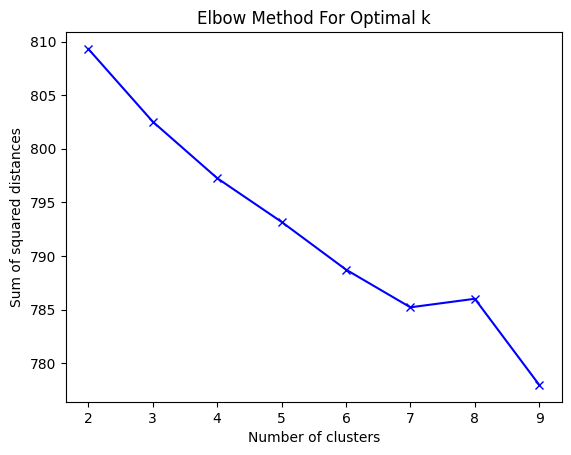

In [23]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [24]:
# Get clusters
import numpy
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=6000, n_init=10) #np.random.seed(27)
model.fit(X)

# Get prediction/ labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df["title"],labels)),columns=['title','cluster'])
print(book_cl.sort_values(by=['cluster']))

                                                 title  cluster
157  Spreadsheet Modeling and Decision Analysis: A ...        0
509  Advancing into Analytics: From Excel to Python...        0
179  The Definitive Guide to DAX: Business Intellig...        0
176  DATA ANALYTICS: A Comprehensive Beginner’s Gui...        0
174  Microsoft Office 365 for Beginners: 12 Books I...        0
..                                                 ...      ...
696  Urban Informatics (Chapman & Hall/CRC Data Sci...        5
796  Basketball Data Science: With Applications in ...        5
798  Algorithms For Dummies (For Dummies (Computer/...        5
68                                       R For Dummies        5
238  Bayesian Artificial Intelligence (Chapman & Ha...        5

[830 rows x 2 columns]


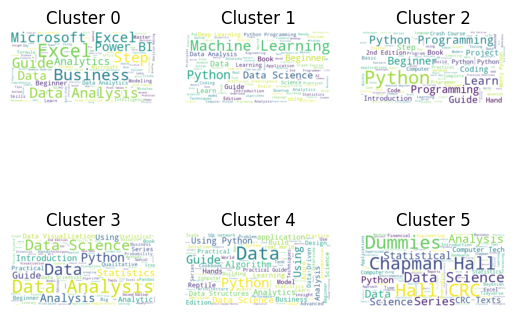

In [25]:
# Create wordclouds for clusters
from wordcloud import WordCloud

for k in range(true_k):
   text = book_cl[book_cl.cluster == k]['title'].str.cat(sep=' ')
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

   # Create subplot
   plt.subplot(2, 3, k+1).set_title("Cluster " + str(k)) 
   plt.plot()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
plt.show()

In [26]:
# Prediction on unseen data
test = vectorizer.transform(['Pytorch Deep learning'])
model.predict(test)[0]

1

Scraping Amazon Book reviews

In [27]:
#test
product_url = "https://www.amazon.com/Becoming-Data-Head-Understand-Statistics/dp/1119741742/"
reviews_url  = "https://www.amazon.com/Becoming-Data-Head-Understand-Statistics/product-reviews/1119741742/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [28]:
def get_review_url(product_url):
    try:
        split_url = product_url.split('dp')
        product_number = split_url[1].split('/')[1]
        review_url = split_url[0] + 'product-reviews/' + product_number + "/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
    except:
        review_url = None
    return review_url

In [29]:
# Create review urls for each book in dataset
df['review_urls'] = df['complete_link'].apply(lambda x: get_review_url(x))

# Remove empty review urls and create a new dataset
df_reviews = df.loc[~df['review_urls'].isnull()].reset_index()

In [30]:
df_reviews

,index,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,...,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link,review_urls
0,0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500.0,4.4,23.0,0.55,0.39,...,0.00,0.00,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...,https://www.amazon.com/Data-Analysis-Using-Low...
1,1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484.0,4.3,124.0,0.61,0.20,...,0.04,0.06,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...,https://www.amazon.com/Head-First-Data-Analysi...
2,2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274.0,4.7,10.0,0.87,0.13,...,0.00,0.00,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547.0,4.6,1686.0,0.75,0.16,...,0.02,0.02,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368.0,3.9,12.0,0.52,0.17,...,0.10,0.10,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...,https://www.amazon.com/Excel-Data-Analysis-Dum...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,824,Data Science (The MIT Press Essential Knowledg...,NaN,9.69,9.69,280.0,4.5,404.0,0.67,0.21,...,0.03,0.02,5 x 0.57 x 6.9 inches,8.8 ounces,English,"The MIT Press; Illustrated edition (April 13, ...",99,/Data-Science-Press-Essential-Knowledge/dp/026...,https://www.amazon.com/Data-Science-Press-Esse...,https://www.amazon.com/Data-Science-Press-Esse...
681,825,Deep Learning: Engage the World Change the World,"[ Michael Fullan, Joanne Quinn, et al.]",5.33,8.55 - 35.33,208.0,4.5,74.0,0.72,0.14,...,0.02,0.04,7 x 0.47 x 10 inches,15.5 ounces,English,"Corwin; First edition (December 15, 2017)",59,/Deep-Learning-Engage-World-Change/dp/15063685...,https://www.amazon.com/Deep-Learning-Engage-Wo...,https://www.amazon.com/Deep-Learning-Engage-Wo...
682,826,Machine Learning in Finance: From Theory to Pr...,"[ Matthew F. Dixon, Igor Halperin, et al.]",55.18,52.41 - 55.18,573.0,4.5,93.0,0.78,0.07,...,0.04,0.04,6.14 x 1.25 x 9.21 inches,2.25 pounds,English,"Springer; 1st ed. 2020 edition (July 2, 2020)",,/Machine-Learning-Finance-Theory-Practice/dp/3...,https://www.amazon.com/Machine-Learning-Financ...,https://www.amazon.com/Machine-Learning-Financ...
683,828,Clinical Biostatistics and Epidemiology Made R...,NaN,0.00,NaN,0.0,0.0,0.0,0.00,0.00,...,0.00,0.00,NaN,NaN,NaN,NaN,NaN,/Clinical-Biostatistics-Epidemiology-Ridiculou...,https://www.amazon.com/Clinical-Biostatistics-...,https://www.amazon.com/Clinical-Biostatistics-...


import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import logging

headers = {
    "authority": "www.amazon.com",
    "pragma": "no-cache",
    "cache-control": "no-cache",
    "dnt": "1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "sec-fetch-site": "none",
    "sec-fetch-mode": "navigate",
    "sec-fetch-dest": "document",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
}

URLS = df_reviews['review_urls']
book_titles = df_reviews['title']

def get_page_html(page_url: str) -> str:
    resp = requests.get(page_url, headers=headers)
    return resp.text

def get_reviews_from_html(page_html: str) -> BeautifulSoup:
    soup = BeautifulSoup(page_html, "lxml")
    reviews = soup.find_all("div", {"class": "a-section celwidget"})
    return reviews

def get_review_text(soup_object: BeautifulSoup) -> str:
    review_text = soup_object.find(
        "span", {"class": "a-size-base review-text review-text-content"}
    ).get_text()
    return review_text.strip()

def get_number_stars(soup_object: BeautifulSoup) -> str:
    stars = soup_object.find("span", {"class": "a-icon-alt"}).get_text()
    return stars.strip()

def orchestrate_data_gathering(single_review: BeautifulSoup) -> dict:
    return {
        "review_text": get_review_text(single_review),
        "review_stars": get_number_stars(single_review)
    }

if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    all_results = []

    for i in range(len(URLS)):
        logging.info(URLS[i])
        html = get_page_html(URLS[i])
        reviews = get_reviews_from_html(html)
        for rev in reviews:
            data = orchestrate_data_gathering(rev)
            data.update({'title': df_reviews['title'][i]})
            all_results.append(data)

    out = pd.DataFrame.from_records(all_results)
    logging.info(f"Total number of reviews {out.shape[0]}")
    save_name = f"book_reviews_{datetime.now().strftime('%Y-%m-%d-%m')}.csv"
    logging.info(f"saving to {save_name}")
    out.to_csv(save_name, index=False)
    logging.info('Done yayy')

output_data = out
output_data

In [32]:
book_reviews = pd.read_csv('C:/Users/Nick/Desktop/Amazon_prediction/EDA/book_reviews_2023-12-12-12.csv')

# Aggregate reviews for each book title
book_reviews['review_text'] = book_reviews['review_text'].astype(str)
book_reviews_agg = book_reviews.groupby(['title'], as_index = False).agg({'review_text': ' '.join})
book_reviews_agg

,title,review_text
0,100 Days of Code Learning Journal: Notebook fo...,Great book. I only bought it for the calendar ...
1,2Pack Reptile Plants Hanging Silk Terrarium Pl...,I bought this to give my baby California Kings...
2,A Common-Sense Guide to Data Structures and Al...,This book definitely lives up to its title. It...
3,A Hands-On Introduction to Data Science,In order to appreciate this text it is importa...
4,A History of Data Visualization and Graphic Co...,Data visualization is a broad area and graphic...
...,...,...
590,Ultimate Step by Step Guide to Machine Learnin...,Not sure I understand many of the other review...
591,Using Asyncio in Python: Understanding Python'...,This book provides the information you need to...
592,Web Scraping with Python: Collecting More Data...,Wouldn't dive into it before you have a basic ...
593,"Zoo Med Reptile Rock Corner Water Dish, Large ...",Color is a little random. Mine was more green....


In [36]:
!nvidia-smi

Tue Dec 12 21:02:34 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.98                 Driver Version: 535.98       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P8               3W /  90W |      0MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [39]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu122

ERROR: Could not find a version that satisfies the requirement torchvision (from versions: none)
ERROR: No matching distribution found for torchvision


Looking in indexes: https://download.pytorch.org/whl/cu122


In [41]:
!pip uninstall torch torchvision torchaudio


^C


In [40]:
# Load model directly
#from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import pipeline

#tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-xsum")
#model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-xsum")


pipe = pipeline("summarization", model="facebook/bart-large-xsum", device=0)

AssertionError: Torch not compiled with CUDA enabled

Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
      --------------------------------------- 0.1/5.6 MB 2.0 MB/s eta 0:00:03
     - -------------------------------------- 0.3/5.6 MB 3.2 MB/s eta 0:00:02
     --- ------------------------------------ 0.5/5.6 MB 4.2 MB/s eta 0:00:02
     ------- -------------------------------- 1.1/5.6 MB 6.5 MB/s eta 0:00:01
     ---------------- ----------------------- 2.3/5.6 MB 10.5 MB/s eta 0:00:01
     ----------------------------- ---------- 4.1/5.6 MB 15.5 MB/s eta 0:00:01
     ---------------------------------------- 5.6/5.6 MB 18.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     ----------- ---------------------------- 1.2/4.0 MB 37.0 MB/s eta 0:00:01
     ------------------------- -------------- 2.5/4.0 MB 26.9 MB/s eta 0:00:01
     ---------------------------------------- 4.0/4.0 MB 32.1 MB/s eta 0:00:00
     --------

  You can safely remove it manually.
